# 准备工作

In [1]:
import numpy as np
# 需要安装roboticstoolbox-python
!pip install roboticstoolbox-python
!pip install modern_robotics

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

In [3]:
robot = rtb.models.LBR()
print(robot)

ERobot: kuka_lbr_iiwa_14_r820 (by Kuka), 7 joints (RRRRRRR), 2 branches, geometry, collision
┌─────┬───────────┬───────┬───────────┬───────────────────────────────────┐
│link │   link    │ joint │  parent   │        ETS: parent to link        │
├─────┼───────────┼───────┼───────────┼───────────────────────────────────┤
│   0 │ base_link │       │ BASE      │ SE3()                             │
│   1 │ link_1    │     0 │ base_link │ SE3() ⊕ Rz(q0)                    │
│   2 │ link_2    │     1 │ link_1    │ SE3(-0.0004362, 0, 0.36) ⊕ Ry(q1) │
│   3 │ link_3    │     2 │ link_2    │ SE3() ⊕ Rz(q2)                    │
│   4 │ link_4    │     3 │ link_3    │ SE3(0.0004362, 0, 0.42) ⊕ Ry(-q3) │
│   5 │ link_5    │     4 │ link_4    │ SE3() ⊕ Rz(q4)                    │
│   6 │ link_6    │     5 │ link_5    │ SE3(0, 0, 0.4) ⊕ Ry(q5)           │
│   7 │ link_7    │     6 │ link_6    │ SE3() ⊕ Rz(q6)                    │
│   8 │ @tool0    │       │ link_7    │ SE3(0, 0, 0.126)               

In [2]:
from spatialmath import *
from spatialmath.base import *


Rot x: 
 [[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]]
--------
   1         0         0         0         
   0         0.866    -0.5       0         
   0         0.5       0.866     0         
   0         0         0         1         


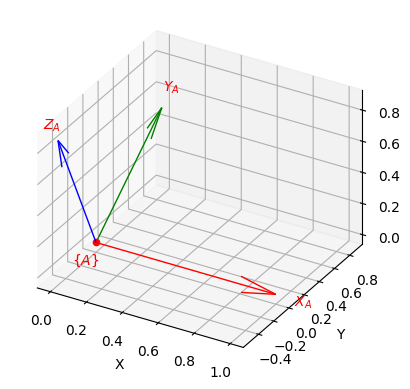

In [8]:
# 绕x轴旋转30度
print('Rot x: \n', rotx(30, 'deg'))
# # 绕y轴旋转30度
# print('Rot y: \n', roty(30, 'deg'))
# # 绕z轴旋转30度
# print('Rot z: \n', rotz(30, 'deg'))

a = SO3(rotx(30, 'deg'))
a.plot(frame='A', style='rgb')
# trplot(a, frame='A', rviz=True)

print('--------')
X = SE3.Rx(30, 'deg')
X.print()

In [9]:
import math
import modern_robotics as mr

angle = math.radians(30)
print(angle)
mr.MatrixExp3(mr.VecToso3([angle, 0, 0]))



0.5235987755982988


array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.8660254, -0.5      ],
       [ 0.       ,  0.5      ,  0.8660254]])

multiple end-effectors present, ambiguous, using self.ee_links[0]
IKSolution: q=[-0.44, 1.2, -0.04314, -1.168, 0.05747, 0.775, -0.4967], success=True, iterations=7, searches=1, residual=3.44e-07
  -1        -2.158e-07 -8.765e-08  0.6       
  -2.158e-07  1        -1.903e-07 -0.3       
   8.765e-08 -1.903e-07 -1         0.1       
   0         0         0         1         

50


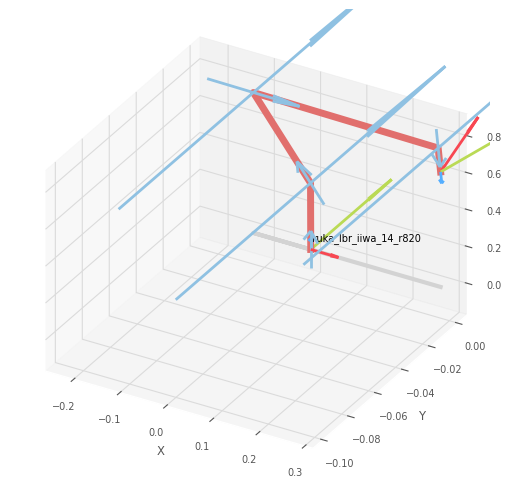

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'kuka_lbr_iiwa_14_r820')

<Figure size 640x480 with 0 Axes>

In [7]:
Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ikine_LM(Tep, q0=robot.qr)
print(sol)

q_pickup = sol.q
print(robot.fkine(q_pickup))

qt = rtb.jtraj(robot.qr, q_pickup, 50)

print(len(qt.q))
robot.plot(qt.q, backend="pyplot")
